In [29]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
import statsmodels.api as sm
import statsmodels.stats.weightstats as ws
from statsmodels.stats.power import tt_ind_solve_power
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
x = load_boston()
dat = pd.DataFrame(x.data, columns = x.feature_names)
dat["MEDV"] = x.target
X = dat.drop("MEDV",1).values   
y = dat["MEDV"].values          
dat.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Q# 1.1 The Variable Selected  is "RM", Average Number of Rooms Per Dwelling 
 **Mean RM = 6.28**
 
 **STD  RM = 0.70**
 
 

In [2]:
print('Q# 1.1 Mean of RM, Average Number of Rooms Per Dwelling) = ' + str(np.mean(dat.RM)))
print('Q# 1.1 STD of RM, Average Number of Rooms Per Dwelling) = ' + str(np.std(dat.RM)))



Q# 1.1 Mean of RM, Average Number of Rooms Per Dwelling) = 6.284634387351787
Q# 1.1 STD of RM, Average Number of Rooms Per Dwelling) = 0.7019225143345692


 # Q# 1.2 Histogram 

Text(0.5, 0, 'RM, Average Number of Rooms Per Dwelling')

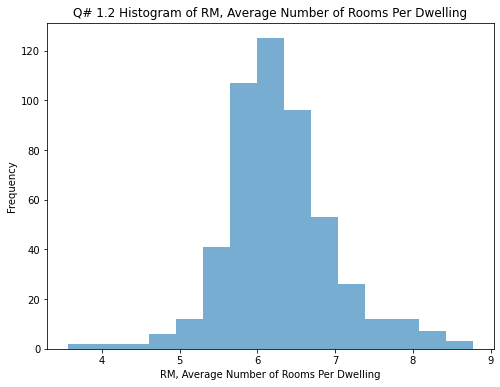

In [4]:
## Plot a histogram
ax = plt.figure(figsize=(8, 6)).gca() # define axis
dat.RM.plot.hist(ax = ax, alpha = 0.6, bins = 15)
plt.title('Q# 1.2 Histogram of RM, Average Number of Rooms Per Dwelling')
plt.xlabel('RM, Average Number of Rooms Per Dwelling')

# Q# 1.3 Sample Correlation, Variable 'RM'

The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

**— A value closer to 1 implies stronger positive correlation**

— A value closer to -1 implies stronger negative correlation

In [8]:
dat[['RM','MEDV']].corr().round(3)

,RM,MEDV
RM,1.000,0.695
MEDV,0.695,1.000


The sample correlation between the RM, Average Number of Rooms Per Dwelling and MEDV, Median value of owner-occupied homes in $1000’s is 0.695 which is closer to 1 that implies a stronger positive correlation.

In [9]:
#_ = pd.plotting.scatter_matrix(dat, c = y, figsize = [8,8], s=150, marker = 'D')

# Q# 1.4 Predicting MEDV

In [10]:
predictors = sm.add_constant(dat.RM, prepend = False)

lm_mod = sm.OLS(dat.MEDV, predictors)
res = lm_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           2.49e-74
Time:                        05:58:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             9.1021      0.419     21.722      0.0

The Regression equation for a single predictor, $Y = b_0 + b_1 x$

MEDV can be predicted based on the coefficient values from the above Table

Y = MEDV, x = RM, $b_0$ = -34.67, $b_1$ =  9.102 

**MEDV = -34.67 + 9.102(RM)**

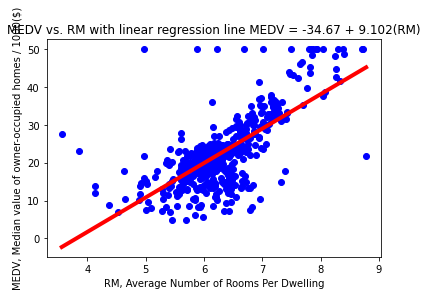

In [11]:
X_RM = X[:, 5]
y = y.reshape(-1,1)
X_RM = X_RM.reshape(-1,1)
reg = LinearRegression()
reg.fit(X_RM, y)
prediction_space = np.linspace(min(X_RM), max(X_RM)).reshape(-1,1)  
plt.scatter(X_RM, y, color='blue')
plt.ylabel('MEDV, Median value of owner-occupied homes / 1000($)')
plt.xlabel('RM, Average Number of Rooms Per Dwelling')
plt.title('MEDV vs. RM with linear regression line MEDV = -34.67 + 9.102(RM)')
plt.plot(prediction_space, reg.predict(prediction_space), color='red', linewidth=4)
plt.show()

# Q# 2.1 NULL HYPOTHESIS : 
The Tracts that border the CHARLES RIVER (CHAS) will have no effects on MEDIAN PRICE (MEDV)

**$H_0 :\ \mu_{MEDV, CHAS=1} - \mu_{MEDV, CHAS=0} = 0$** 

In [166]:
dat[['CHAS','MEDV']].groupby('CHAS').mean().round(3) 

,MEDV
CHAS,
0.0,22.094
1.0,28.440


In [6]:
def t_test_two_samp(dat, alpha, alternative='two-sided'):
    
    a = dat[dat.CHAS == 1]['MEDV']
    b = dat[dat.CHAS == 0]['MEDV']    
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low90CI', 'High90CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test_two_samp(dat, 0.10)
test

DegFreedom    36.876409
Difference     6.346157
Statistic      3.996437
PValue         0.000074
Low90CI        2.906876
High90CI       9.785438
dtype: float64

# Q# 2.2 p-value
Notice that the p-value is 0.000074 (PValue from above Table). This is clearly less than .05 (p < .05) so we can reject the null hypothesis and conclude that the tracts that border the Charles River (CHAS) will have higher median price(MEDV) than those do not bound with Charles River was not a statistical fluke but likely a real trend in the population.

# Q# 2.3 90% Confidence Interval
The 90% confidence interval tells that it's probably not zero and that it's probably between 2.91 and 9.80 **(Low90CI and High90CI from the above Table)**. It rejects the null and tells that the target price (MEDV) of tacts that border the Charles River (CHAS =1) is greater than MEDV of tacts that do not have border with Charles River (CHAS = 0) by probably a minimum difference of 2.91 and a maximum of 9.80. 

In [3]:
d = (28.44 - 22.1)/(np.std(dat.loc[dat.CHAS == 1, 'MEDV']))
d

0.5443643747672091

# Q# 2.4 Cohen's d (Effect Size)

In [5]:
tt_ind_solve_power(effect_size=0.6, nobs1 = None, alpha=0.10, power=0.8, ratio=1, alternative='two-sided')

35.042258702728816

Here we see that we would need group size nearly 35 per sample to detect small differences when an effect size (Cohen's d) of 0.544 with 80% Power (power = 0.8) and 90% Confidence Intervel (alpha = 0.10). If we were planning the study from the start, we might iteratively explore several possible sample sizes to find the optimal balance between sample size and ability to detect an effect.

# Q# 3 Adding New Features - High Schools in the Census Tract
(Based on Module 5 Lab 3- Experiments)

# 3.1 Design an Experiment:

An experiment of analysis on how the location of highschools available in the tract will affect the medium housing price values. One of the biggest concern on the buying behavior of people is that the standard of High Schools available in the school district within the tract. People used to check the ranking of high schools in the corresponding school districts and buy the houses in the nearby location of high ranking Highschools. Depend on the location of those Highschools, the house pricing will vary. Here, we consider 3 different ranking highschools HS-A, HS-B, HS-C and randomly distributed between the medium hosue price values (MEDV) on an experiment basis.

The concepts of between-subjects experiment has been applied across "HighSchool" Vs "MEDV". The effects of these new features on the Median House Pricing has been analyzed including review of statistical modeling, power analysis, effect size, measurement, and so on 


In [31]:
np.random.seed(1234)
HighSchool= []
for x in range (506):
    Rank = np.random.randint(1,4)
    if Rank == 1:
        HighSchool.append("HS-A")
    elif Rank == 2:
        HighSchool.append("HS-B")
    else :
        HighSchool.append("HS-C")
dat['HighSchool'] = HighSchool

dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,HighSchool
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,HS-C
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,HS-B
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,HS-A
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,HS-A
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,HS-A


We do a final quick inspection on the variables in the dataset.

In [4]:
dat.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 

# 3.2 Power Overview

In [33]:
HighSchool_grouped.count()

,MEDV
HighSchool,
HS-A,160
HS-B,182
HS-C,164


In [32]:
HighSchool_grouped = dat[['HighSchool','MEDV']].groupby('HighSchool')

print('Mean by HighSchool')
print(HighSchool_grouped.mean().round(2))
print('\n Standard deviation by HighSchool')
print(HighSchool_grouped.std().round(2))

Mean by HighSchool
             MEDV
HighSchool       
HS-A        23.03
HS-B        23.41
HS-C        21.07

 Standard deviation by HighSchool
            MEDV
HighSchool      
HS-A        9.03
HS-B        9.43
HS-C        8.97


Technically defined, power is the proportion of the time in which provides p < .05 for a given population effect size. Power is relevant only when the null hypothesis is false. In order to keep statistical significance, p < .05, usually the recommendation is .80 or higher.

Regarding good power...0.80 or higher, Power is highly dependent on sample size. This can be easily calculated using the tt_ind_solve_power function in the statsmodels.stats.power Python package. The d Value is calculated below 



In [34]:
d = (23.41 - 23.03)/(np.std(dat.loc[dat.HighSchool == 'HS-B', 'MEDV']))
d

0.040411307794585134

The calculate d value is 0.04 for the difference between HS-A and HS-B:

The standard guidelines for Cohen's d are:
<pre>
| #  |    d Value    |  Meaning   |
|:--:|:-------------:|:----------:|
| 1. |    0 - 0.2    | Negligible |
| 2. |   0.2 - 0.5   |   Small    |
| 3. |   0.5 - 0.8   |   Medium   |
| 4. |     0.80 +    |   Large    |
</pre>

Here the calculated d value, 0.04 which is negligible according to Cohen's d table 

In [39]:
tt_ind_solve_power(effect_size=d, nobs1 = None, alpha=0.05, power= 0.8, ratio=1, alternative='two-sided')

9613.337604271803

In order to keep a statistical significance, ie the Highschools HS-A and HS-B are significantly different in thier standard ranking and that would affect the housing pricing, to keep p < .05, we need to use power = 0.80. However, with this calculated d value(0.4), substantialy a large sample size of 9613 is required. This is so expensive. Hence, we need to increase the d value at least to 0.4 to get nominal sample size to achive the 

Null Hypothesis ($H_0 :\ \mu_{MEDV, HS-B} - \mu_{MEDV, HS-A} = 0$ ) false.    

In [44]:
tt_ind_solve_power(effect_size=0.4, nobs1 = None, alpha=0.05, power= 0.8, ratio=1, alternative='two-sided')

99.08032683981111

Indeed, now we have reached 80% power, the standard guideline for acceptable power. At 80% power, we need a sample size =~ 100 which is relatively affordable sample size. If power was low, risk missing real effects, spending time and energy on a study coming up empty even when there is something to be found.

To reiterate, in power calculations, there are always three things that interrelate:

Power
Sample size (n per group in group-comparison studies)
Effect size
In most power calculators, you enter any two of those three, and the third can be determined for you. See the above calculation.

# 3.3 Visualization of HighSchool Vs MEDV:
In the between-subjects design, comparing means across groups. Thus, we can visualize our data by looking at the random distribution of HS-A, HS-B. HS-C across MEDV. The plot is created using the boxplot method from Seaborn along with the swarmplot method so we can see the individual data points:

From the boxplot visulaization given below, We can see in our sample that HS-A and HS-B appear to result in the higher median house price (MEDV) in the cesnus tract than house prices for HS-C.

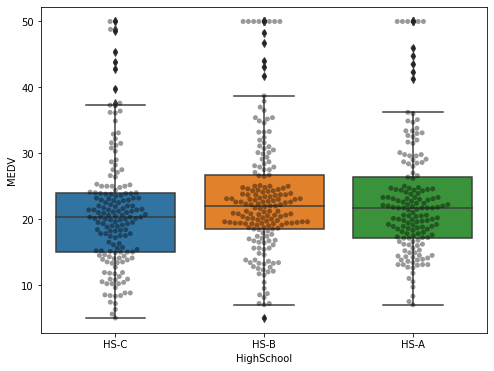

In [35]:
ax = plt.figure(figsize=(8,6)).gca() # define axis
sns.boxplot(x = 'HighSchool', y = 'MEDV', data = dat, ax = ax)
sns.swarmplot(x = 'HighSchool', y = 'MEDV', color = 'black', data = dat, ax = ax, alpha = 0.4)